# Earthquake Lab

IMPORTANT!

PLEASE NOTE: This notebook is running remotely, and will time out after ~30 minutes of inactivity and your work will be lost. When you finish this lab, or want to take a break DOWNLOAD THIS FILE SO THAT YOUR WORK IS SAVED. 

Download as follows:

Under the File menu in the upper left select 'Download as', and then 'Notebook (.ipybn)'. Your file will download to your computer. A new browser window may open, which is fine (you can close it). 

## Lab introduction

In this lab we will both gain some experience programming in Python, and explore interesting patterns of seismicity in the central part of New Mexico (where we will be next week!). 



## Becoming familiar with Python

Programming is a way to speak with your computer, and Python is a programming "language" that is used by a huge number of scientists, engineers, and designers today. 

Here are some things to know:

1) Within this Notebook you can "run" each cell by typing Shift + Enter.

2) When a cell is running a * will appear to the left of the cell in place of the number within brackets. Some cells take a moment to run. If you see the *, hold tight. 





We will start by becoming familiar with some simple programming commands.


Try placing your cursor in the cell below and typing Shift + Enter.

In [1]:
print('This cell just ran correctly!')

This cell just ran correctly!


Now Shift + Enter to run this cell, then read the text below

In [24]:
print('Hello, world!'

Hello, world!


All parantheses, brackets, quotes, etc. need to be closed like this: (  ) for the code to run. Fix the code in the cell above and try running it again to resolve the error. 

Now Shift + Enter to run the cell below (don't modify anything!). This sets up some code we will use later in this lab. 

In [3]:
## DO NOT MODIFY ##
# Import libraries for use later on
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random
import os
import csv
import datetime
from mpl_toolkits.basemap import Basemap
import urllib.request as urllib2
from scipy.stats import gaussian_kde
import pandas

In Python, letters surrounded by 'quotes' are recognized as words. If you leave off the quotes the computer will assume the letters represent a variable, i.e., a = 6, or dog = 7. 

Anything that comes after the # symbol is a comment, i.e., it is not run as code, it's just a note to yourself. Feel free to add your own comments to the code throughout this lab.

 

## Enter your names in the cell below. 

In [4]:
#Fill in your names here in place of 'Kira' and 'Tainran'. 
#Make sure names are surrounded by single quote marks, like 'so'

P1 = 'Kira' # Person 1
P2 = 'Tianran' # Person 2


print('This lab is being completed by %s and %s' %(P1,P2))

This lab is being completed by Kira and Tianran


In the cell above you asigned words to the variables P1 and P2, then in the print statement you didn't have to type out the names, you could just reference the variables.

Variables can be assigned to lists by using square brackets: [  ] 

Run the cell below.

In [5]:
people = [P1,P2]

print(people)

rocks = ['shale','sandstone','limestone']

print(rocks)

['Kira', 'Tianran']
['shale', 'sandstone', 'limestone']


You now have two lists of words, and when you print the list "rocks" you can see that it is a set of rock names

Try one more example, run this cell:

In [8]:
nouns = ['cats','handsamples of schist','burritos','quartz crystals']
numbers = [3,11,91, 4000]

print('%s is most excited about the part of this lab where we learn about %s %s.' 
      %(random.choice(people),random.choice(numbers),random.choice(nouns)))

Tianran is most excited about the part of this lab where we learn about 4000 handsamples of schist.


The cell above is randomly selecting a value from each list: people, nouns, and numbers. 
Run the cell above another time and you should get a different sentence. 

Now we will move on to the lab. Much of the code is already written for you, but you will have a chance to write some of your own at the end. 

## Part 1) Import earthquake data and make a map
In this lab will investigate a dataset of earthquakes in New Mexico, recorded between 2010-2014. 

Shift + Enter to run the cell below

In [9]:
#Import earthquake data
eq_url = "https://raw.githubusercontent.com/kgo2105/Earthquake_lab/master/nm_eqs.txt" #location of text file
response = urllib2.urlopen(eq_url)
data = np.loadtxt(response, delimiter= '\t') # Load in this text file, columns are seperated by tabs


# Pull out each variable
date = [int(row[0]) for row in data] # date is in format yyyymmdd
lat = [float(row[1]) for row in data]
lon = [row[2] for row in data]
depth = [row[3] for row in data]
mag = [row[4] for row in data]

It is always smart to look at your data before you start working with it, to make sure it includes the kind of data you think it does! 

In [10]:
# Look at data set
data2 = pandas.DataFrame(data = data, columns = ('Date','lat','lon','depth','mag'))
print(data2)


# Columns: line number, EQ Date (yyyymmdd), latitude, longidue, depth of EQ in km, magnitude of EQ
#Python starts counting at 0 instead of 1

            Date     lat      lon  depth   mag
0     20141227.0  34.044 -106.953   5.00  0.88
1     20141220.0  34.241 -106.834   5.00  0.04
2     20141218.0  33.874 -107.107   5.00  1.14
3     20141209.0  34.300 -106.584   5.00  1.13
4     20141207.0  33.993 -106.920   5.00 -0.16
5     20141124.0  34.047 -106.992   5.00  0.42
6     20141124.0  34.082 -106.904   5.00 -0.79
7     20141120.0  34.257 -106.819   5.00  2.00
8     20141119.0  34.169 -107.049   5.00  1.18
9     20141117.0  33.894 -103.968   5.00  1.20
10    20141116.0  34.425 -103.509   5.00  1.73
11    20141114.0  34.274 -106.811   5.00  1.77
12    20141112.0  34.160 -106.821   5.00  1.79
13    20141112.0  34.176 -106.825   5.00  1.84
14    20141111.0  33.876 -106.960   5.00  0.30
15    20141110.0  34.529 -107.297   5.00 -0.10
16    20141107.0  34.251 -106.828   5.00  0.62
17    20141107.0  34.215 -106.968   9.90  1.51
18    20141107.0  34.109 -107.041   5.00 -0.01
19    20141101.0  34.338 -106.853   5.00  1.59
20    2014103

You can see that this dataset includes 2603 rows, each of which gives you information about a single earthquake in NM. Scroll to the top to see the column headers. The column on the far left is line number (python starts counting at 0 instead of 1, so the first row is the 0th row).

## Import geographic data to draw map
Shift + Enter to run the cell

In [11]:
# Run this cell to import the topography of NM and set up the map
topo_url = "https://raw.githubusercontent.com/kgo2105/Earthquake_lab/master/etopo1_bedrock.txt"
response = urllib2.urlopen(topo_url)

# Read header (number of columns and rows, cell-size, and lower left coordinates)
ncols = int(response.readline().split()[1])
nrows = int(response.readline().split()[1])
xllcorner = float(response.readline().split()[1])
yllcorner = float(response.readline().split()[1])
cellsize = float(response.readline().split()[1])

# Read in topography as a whole, disregarding first five rows (header)
etopo = np.loadtxt(response, skiprows = 0)

# Data resolution is quite high. I decrease the data resolution 
# to decrease the size of the final figure
dres = 2

# Swap the rows
etopo[:nrows+1, :] = etopo[nrows+1::-1, :]
etopo = etopo[::dres, ::dres]

# Create longitude and latitude vectors for etopo
lons = np.arange(xllcorner, xllcorner+cellsize*ncols, cellsize)[::dres]
lats = np.arange(yllcorner, yllcorner+cellsize*nrows, cellsize)[::dres]

## Draw a map of New Mexico

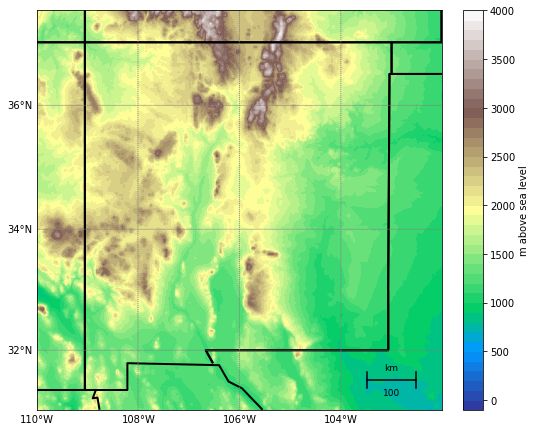

In [33]:
# 1. Draw the map background
fig = plt.figure(figsize=(8, 8))

m = Basemap(llcrnrlon=-110.,llcrnrlat=31.,urcrnrlon=-102.,urcrnrlat=37.5,\
            resolution='l',projection='merc',\
            lat_0=40.,lon_0=-20.,lat_ts=20.)

# Convert etopo1 coordinates lon/lat in ° to x/y in m
# (Calling a Basemap class instance with the arguments
# lon, lat will convert lon/lat (in degrees) to x/y map projection coordinates
# (in meters).)
rlons, rlats = m(*np.meshgrid(lons,lats))

# Draw etopo1 to plot topography on a colorscale
llevels = np.arange(-100,4100,100) # check etopo.ravel().max()
lcs = m.contourf(rlons, rlats, etopo, llevels, cmap=plt.cm.terrain)
# olevels = np.arange(-3500,1,100) # check etopo.ravel().min()
# cso = m.contourf(rlons, rlats, etopo, olevels, cmap=plt.cm.ocean)

# #m.shadedrelief()
m.drawparallels(np.arange(30,40,2),labels=[1,0,0,0], color = 'grey')
m.drawmeridians(np.arange(-110,-102,2),labels=[0,0,0,1], color = 'grey')
m.drawstates(color = 'black', linewidth = 2)
m.drawcountries(color='black', linewidth = 2)

# Add scale to map
m.drawmapscale(-103, 31.5, -106, 32, 100, barstyle='simple', units='km', fontsize=9, yoffset=None, labelstyle='simple', fontcolor='k', fillcolor1='w', fillcolor2='k',format='%d')
# m.colorbar(boundaries = [2000,6000])
# m.cmap()
# cs = m.contourf(x,y,data,clevs,cmap=cm.s3pcpn)
# add colorbar.
cbar = m.colorbar(lcs,location='right',pad="5%")
cbar.set_label('m above sea level')

%config InlineBackend.close_figures=False # keep figures open in pyplot

Nice job! Your first map! Topography is denoted by the colorscale given on the right. The low topography running from north to south through central NM is called the Rio Grande Rift, and we will discuss this much more on our field trip. 

## Plot earthquakes in NM on the map

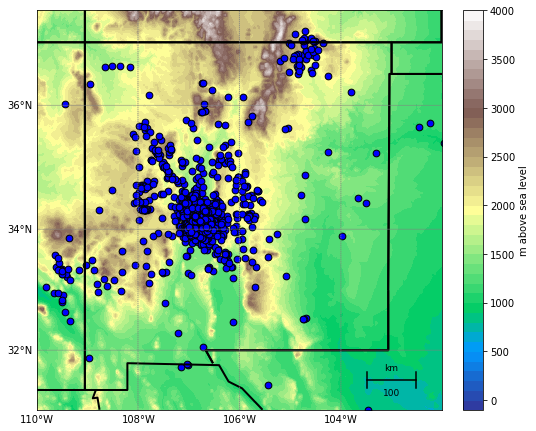

In [34]:
m.scatter(lon,lat, latlon = True, s = 45, edgecolor = 'black', facecolor = 'blue')


## Describe any patterns in the seismicity

Where are there notable concentrations? Absences? Is there any relationship with topography?


** Double click the cell below that says "Type Markdown and LaTeX:  α2" to type in it. Please write your answers to the questions above in this cell.

## The Socorro Seismic Anomaly (SSA) 

The SSA is an unusual seismic reflector at a depth of ~19 km. Elastic earthquake waves traveling down through the crust reflect off something at ~19 km depth, which indicates that the waves have encountered a material with a different density. This feature is anomolous (or "strange") compared to the surrounding crust, and it has been mapped through detailed seismic sturveys. 

Now plot the outline of the Socorro Seismic Anomaly as a red line by running the cell below.

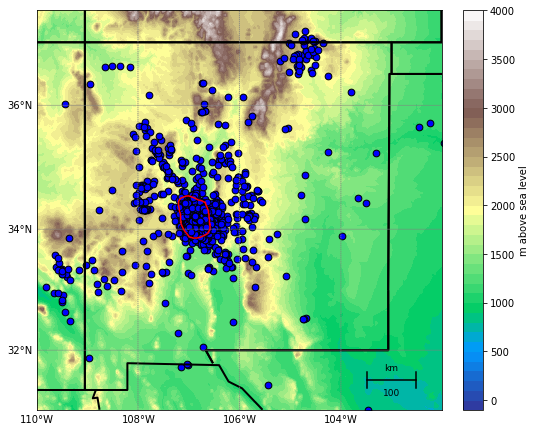

In [35]:
# Import the coordinates of the Socorro Seismic Anomaly
ssa_url = "https://raw.githubusercontent.com/kgo2105/Earthquake_lab/master/socorro_outline.txt"
response = urllib2.urlopen(ssa_url)
ssa = np.loadtxt(response, delimiter= ',')

# Coordinates of the Socorro Seismic Anomaly outline
ssa_lat = [row[1] for row in ssa]
ssa_lon = [row[0] for row in ssa]

# Plot 
m.plot(ssa_lon,ssa_lat, latlon=True, color = 'r', linewidth = 1.5)

The large number of earthquakes plotted on the map above make it hard to see if there is a point in the blob of events with an especially high concentration. 

You can add a color scale so that the region with the most earthquakes stacked on top of each other stands out. Run the cell below. 

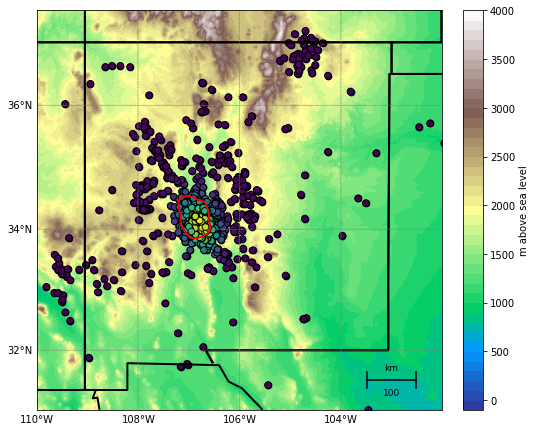

In [36]:
xy = np.vstack([lon,lat])
z = gaussian_kde(xy)(xy)

m.scatter(lon, lat, c = z,latlon = True, s = 45, edgecolor = 'black')
m.plot(ssa_lon,ssa_lat, latlon=True, color = 'r', linewidth = 1.5)



The concentration of earthquakes is now plotted by color, with the highest concentrations being colored yellow and the lowest purple. 

## Question 2)

Comment on the patterns in the seismicity and any correlation you see between areas of increased seismicity and interesting topography. Answer by writing in the cell below (double click to open it).

# Part 2) Investigate earthquake data

## Plot the earthquakes from the maps above by depth

(20, 0)

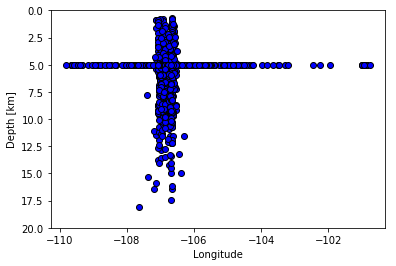

In [37]:
plt.figure()
plt.scatter(lon,depth, color = 'blue', edgecolor = 'black')
plt.xlabel('Longitude')
plt.ylabel('Depth [km]')
plt.ylim(20,0)

## Weird plot!
This is a plot of earthquake depth (on the y-axis) vs. longitude across NM (on the x-axis) - it is basically a cross section of seismicity across the state. Look at the y-axis carefully. There are a lot of earthquakes plotting at a single depth. Run the next plot to examine the depth distribution of earthquakes in this dataset.

(0, 21)

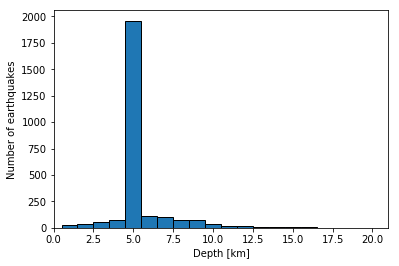

In [31]:
plt.figure()
bins = np.arange(0.5,21.5,1)
h = plt.hist(depth, bins = bins, edgecolor = 'k', align = 'mid')
plt.ylabel('Number of earthquakes')
plt.xlabel('Depth [km]')
plt.xlim(0,21)

Is it feasible that the majority of earthquakes all occurred at depths of exactly 5.0 km? Natural systems contain much more scatter than that. If you see something like this is your dataset you should be suspicious! 

## Earthquakes in this dataset are assigned depths of 5.0 km when the depth cannot be determined. These 5.0 km depths are not accurate. 

Omit depths = 5 km and replot


(30, 0)

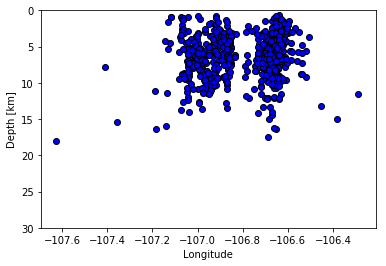

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111)
for i in data:
    if i[3] != 5.0: #does not equal
        ax.scatter(i[2],i[3], color = 'blue', edgecolor = 'black')
ax.set_ylabel('Depth [km]')
ax.set_xlabel('Longitude')
ax.set_ylim(30,0)

## Question x: Describe the depth distribution of earthquakes in the dataset.


Enter your estimate for the lower depth cutoff of seismicity in the cell below (i.e., at what depth do the earthquakes stop)

In [41]:
max_eq_depth = 20      #enter a number here

In [42]:
# Run this cell

ax.axhline(19, color = 'gold', linewidth = 2, zorder = 0, label = 'Balch et al., 1997 depth estimate')
ax.axhline(max_eq_depth, color = 'red', linewidth = 2, label = '%s and %s\'s depth estimate' %(P1,P2))
ax.legend(loc = 'lower left')
#add legend noting student depth, vs. Balch 97 depth

And run the next cell to plot

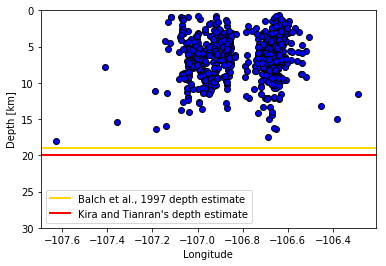

In [43]:
fig

Published studies (e.g., Balch et al., 1997) have estimated the base of the seismicity to be around 19 km depth. It's fine if your estimate is slightly different.

This distribution of earthquakes is one line of evidence scientists have used to infer that $\textbf{an active, sill-like magma chamber is causing the Socorro Seismic Anomaly!}$ 

The magma chamber is known as the Socorro Magma Body (SMB), and is ~150 m thick, and has a lateral extent of ~3,400 km$^2$ (Balch et al., 1997). The volume of magma (molten rock) in the SMB is estimated to be thousands of cubic kilometers.

The land surface above the SMB is currently undergoing uplift at a rate of ~2 mm/yr, due to continued injection of new magma into the SMB (Larsen et al., 1986). It is thought that this uplift has been ongoing for tens of thousands of years at a similar rate.

This cartoon illustrates the inferred geometry of the SMB and seismicity above (figure by Susan Bilek, NM Tech). Red is the magma body, yellow are earthquakes, and towns in NM are plotted as red dots.
![title](smb1.png)

## Question 3) Given the geometry in the figure above, and what you know about the three types of earthquakes, which type or types of earthquake do you think dominate the swarm above the SMB? What kind of stress environment is the crust just above the SMB experiencing? What is causing the earthquakes?

# Plot by date

In [47]:
# Format dates - run this cell
ymd = [] #stands for year, month, day
for i in range(len(date)):
    ymd.append(datetime.datetime.strptime(str(date[i]),'%Y%m%d'))

Your turn to make some figures. Start by making a scatter plot of earthquake magnitude (on the y-axis) vs. time (on the x-axis)

To make the plot, you will need to specify the x and y variables (the values that will plot on the x- and y-axes), which in this case are time and magnitude, respectively.

In the cell below, type: x = ymd, then Shift + Enter to run this cell (which defines your new variable: x

In [84]:
x = ymd

[datetime.datetime(2014, 12, 27, 0, 0), datetime.datetime(2014, 12, 20, 0, 0), datetime.datetime(2014, 12, 18, 0, 0), datetime.datetime(2014, 12, 9, 0, 0), datetime.datetime(2014, 12, 7, 0, 0), datetime.datetime(2014, 11, 24, 0, 0), datetime.datetime(2014, 11, 24, 0, 0), datetime.datetime(2014, 11, 20, 0, 0), datetime.datetime(2014, 11, 19, 0, 0), datetime.datetime(2014, 11, 17, 0, 0)]


'ymd' stands for Year, Month, Day, which is how these dates are formatted. Run the cell below to print out the first 10 values of your variable 'x'. Each item in this list is a date formatted in a specific way for python to read.

In [85]:
print(x[0:10])

[datetime.datetime(2014, 12, 27, 0, 0), datetime.datetime(2014, 12, 20, 0, 0), datetime.datetime(2014, 12, 18, 0, 0), datetime.datetime(2014, 12, 9, 0, 0), datetime.datetime(2014, 12, 7, 0, 0), datetime.datetime(2014, 11, 24, 0, 0), datetime.datetime(2014, 11, 24, 0, 0), datetime.datetime(2014, 11, 20, 0, 0), datetime.datetime(2014, 11, 19, 0, 0), datetime.datetime(2014, 11, 17, 0, 0)]


Now define the y variable, earthquake magnitude, by entering in the cell below: y = mag

In [86]:
y = mag

Run the cell below to print out the first 10 values of this new variable to look at. Each line is the magnitude for one earthquake.

In [87]:
print(y[0:10])

[0.88, 0.04, 1.14, 1.13, -0.16, 0.42, -0.79, 2.0, 1.18, 1.2]


Now you will make a plot of earthquake magnitude vs. time. Modify the values in the cell below to set up your plot.

Here are some colors you can use to change the appearance of your plot:
![title](py_colors.png)

In [103]:
# Edit the variables below to change the appearance of this plot, then Shift + Enter to run this cell

# Color of the dots on your scatter plot
facecolor = 'blue' #change 'blue' to another color from the list above, but make sure the color is within 'quotes'. 

# Color of the dots' edges
edgecolor = 'red' #change this to another color, too

# Color of the plot's background
background_color = 'gold'

/srv/conda/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


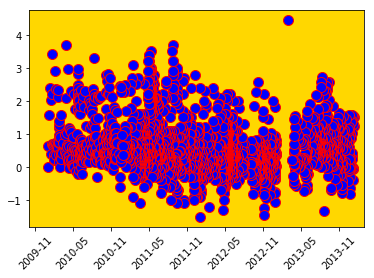

In [107]:
# Make a scatter plot of earthquake magnitude on the y-axis vs. time on the x-axis.
# ymd is the variable containing a list of all earthquake dates
# mag is the variable containing a list of all earthquake magnitudes


fig = plt.figure() #this defines a new figure

plt.scatter(x,y, edgecolor = edgecolor ,color = facecolor, s = 100) # x , y should be the variables you want to plot on those axes

# plt.scatter(ymd,mag, edgecolor = 'black',color = 'blue') # the 

# plt.xlim(2009,2013)
plt.xlim(datetime.datetime(2009, 10, 1),datetime.datetime(2014, 2, 28))
plt.xticks(rotation = 45)
ax = plt.gca()
ax.set_facecolor(background_color)

Want to change your color scheme? Go back and edit the colors you chose in the cell above, and then run that cell and the cell that makes the plot.

Now add text labeling the x- and y-axes

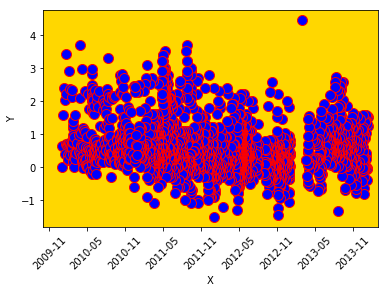

In [108]:
plt.ylabel('') # Label the y-axis. Words must be within 'quotes'
plt.xlabel('') # Label the x-axis

fig # this line plots the figure

 Describe any notable patterns in the temporal evolution of seismicty. Would you expect the number of earthquakes to remain constant over time, or not? Speculate as to the cause of any times with a particularly high number of earthquakes. (The gap in earthquakes in late 2012 was due to instrument failure, so earthquakes likely happened, they just weren't recorded. You can ignore this period.)

In [26]:
date2 = [] # maybe skip these plots of point density
for i in ymd:
    date2.append((i - min(ymd)).total_seconds())

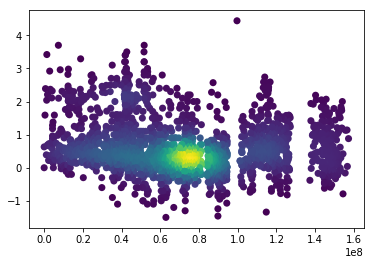

In [27]:
# calculate point density
plt.figure()
xy = np.vstack([date2,mag])
z = gaussian_kde(xy)(xy)
plt.scatter(date2,mag, c = z, s = 50, edgecolor = '', zorder = 200)

Make one last figure. This one will be a histogram showing the distribution of earthquakes with a given magnitude (i.e., are there lots of big ones? Are they all small?)

Set up the colors for this plot in the cell below. 

In [109]:
facecolor = 'pink' #add a color here

edgecolor = 'yellow' #add a color here

background_color = 'grey' #add a color here

/srv/conda/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Text(0,0.5,'Number of Earthquakes')

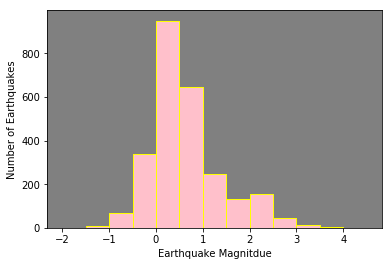

In [118]:
# Run this cell without editing. 

plt.figure()
bins = np.arange(-2,5,0.5)
plt.hist(mag, bins = bins, edgecolor = edgecolor, color = facecolor, align = 'mid' )

ax = plt.gca()
ax.set_facecolor(background_color)

plt.xlabel('Earthquake Magnitdue')
plt.ylabel('Number of Earthquakes')

This plot shows you how many earthqukaes occurred in our dataset with a given magnitude. 

## Question X: Describe the distribution of magnitudes shown in your histogram

Nice job. You've completed this lab. Check with Kira before you leave to ensure that your lab is saved correctly!